In [1]:
import pandas as pd
import matplotlib.pyplot as plt #grafik ve görsellestirme
from sklearn.model_selection import train_test_split #test ve eğitim verilerini bölmek için
from sklearn.neighbors import KNeighborsClassifier #knn modeli sınıfı

In [2]:
with open('/Users/denizdagli/Downloads/spambase/spambase.DOCUMENTATION', 'r') as file:
    content = file.read()
    print(content)


1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [3]:
with open('/Users/denizdagli/Downloads/spambase/spambase.names', 'r') as file:
   content = file.read()
# Dosya içeriğini ekrana yazdırma
print(content)

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

In [5]:
# Veri setini oku
data = pd.read_csv('/Users/denizdagli/Downloads/spambase/spambase.data', header=None)

# Yeni sütun isimlerini belirle
new_column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl',
    'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857',
    'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
    'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
    'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average', 'capital_run_length_longest',
    'capital_run_length_total', 'spam'
]

# Sütun isimlerini değiştir
data.columns = new_column_names
# Güncellenmiş veriyi yeni bir dosyaya yaz
data.to_csv('/Users/denizdagli/Downloads/spambase/spambase_updated.csv', index=False)

In [6]:
# Veri setinin boyutunu göster
data.shape

(4601, 58)

In [7]:
#İlk beş satırı görüntüle
# spam sütünuna göre
# 1: E-posta spamdır (unsolicited commercial e-mail).
# 0: E-posta spam değildir.
data.head() 

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [8]:
# son beş data
data.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,...,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,...,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,...,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [9]:
#Etiket sınıflarının sayısını göster
print(data.spam.value_counts())

spam
0    2788
1    1813
Name: count, dtype: int64


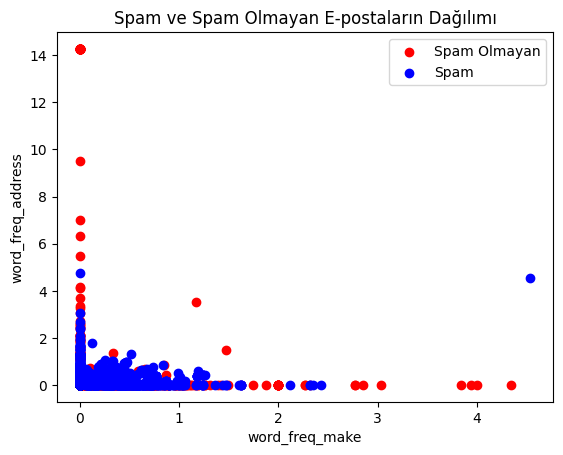

In [10]:
# veri setini daha iyi tanımak için veri setini spam ve spam degil olarak ayıralım

# Spam olmayan e-postaların verisi
non_spam = data[data.spam == 0]
# Spam e-postaların verisi
spam = data[data.spam == 1]

# İki özellik seçildi (örnek olarak)
feature1 = 'word_freq_make'
feature2 = 'word_freq_address'

# Nokta grafiği oluşturma
plt.scatter(non_spam[feature1], non_spam[feature2], label='Spam Olmayan', color="red")
plt.scatter(spam[feature1], spam[feature2], label='Spam', color="blue")

# Grafiği düzenleme
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Spam ve Spam Olmayan E-postaların Dağılımı')
plt.legend()
plt.show()

In [11]:
# 'spam' sütununu çıkararak bağımsız değişkenleri (X) ve bağımlı değişkeni (y) ayırma
X = data.drop(columns="spam")  # 'spam' sütununu çıkar
y = data.spam  # 'spam' sütunu

# Eğitim ve test setlerine ayırma (80% eğitim, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
1370            0.09               0.00           0.09           0.0   
3038            0.00               0.00           0.00           0.0   
2361            0.00               0.00           2.43           0.0   
156             0.00               0.00           0.00           0.0   
2526            0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4426            0.00               0.00           0.00           0.0   
466             0.00               0.23           0.00           0.0   
3092            0.00               0.00           0.00           0.0   
3772            0.00               0.23           0.00           0.0   
860             0.10               0.00           0.41           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
1370           0.39            0.09              0.09     

In [13]:
print(y_test)

3683    0
4412    0
2584    0
69      1
1844    0
       ..
1068    1
4351    0
3027    0
3455    0
1898    0
Name: spam, Length: 921, dtype: int64


In [14]:
#model 
knn = KNeighborsClassifier (n_neighbors=5)
knn.fit(X_train,y_train)
tahmin=knn.predict(X_test)

In [15]:
print (tahmin)

[0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0
 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 0 1 1
 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1
 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0
 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 1
 0 0 1 1 0 0 0 0 0 1 1 0 

In [16]:
print(list(y_test))

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 

In [17]:
knn.score(X_test,y_test)

0.7904451682953312

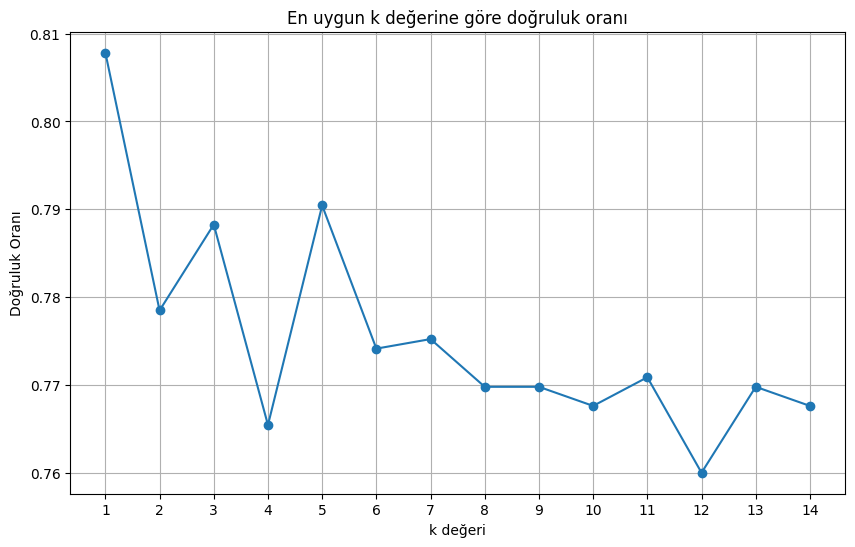

In [18]:
# dogruluk oranını yukseltmek icin en iyi knn degerini veren:
score_list = []

for k in range(1, 15):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    score_list.append(knn_model.score(X_test, y_test))

# Grafik çizimi
plt.figure(figsize=(10, 6))
plt.plot(range(1, 15), score_list, marker='o')
plt.title("En uygun k değerine göre doğruluk oranı")
plt.xlabel("k değeri")
plt.ylabel("Doğruluk Oranı")
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()